Based on [Data Science for Beginners](https://microsoft.github.io/Data-Science-For-Beginners/#/) by Microsoft.

In [62]:
import re
import numpy as np
import requests
from bs4 import BeautifulSoup
import nlp_rake
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from typing import List

In [35]:
# nltk.download('stopwords')

In [101]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [83]:
URLS = ['https://cogsci.jhu.edu/about/#:~:text=Cognitive%20science%20is%20the%20study,are%20realized%20in%20the%20brain.', 
        'https://en.wikipedia.org/wiki/Cognitive_science', 
        'https://www.sciencedirect.com/topics/neuroscience/cognitive-science']

In [84]:
all_text
for url in URLS:
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    headings = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])
    paragraphs = soup.find_all('p')
    headings_text = [heading.text for heading in headings]
    paragraphs_text = [paragraph.text for paragraph in paragraphs]
    home_text = headings_text + paragraphs_text
    home_text = ' '.join(home_text) + ' '
    all_text += home_text
all_text = re.sub(r'\[.+\]', '', all_text)

In [85]:
keyword_extractor = nlp_rake.Rake(stopwords=stopwords.words('english'))
res = keyword_extractor.apply(all_text)

In [87]:
# Make sure data are sorted
res = sorted(res, key=lambda x: x[1], reverse=True)

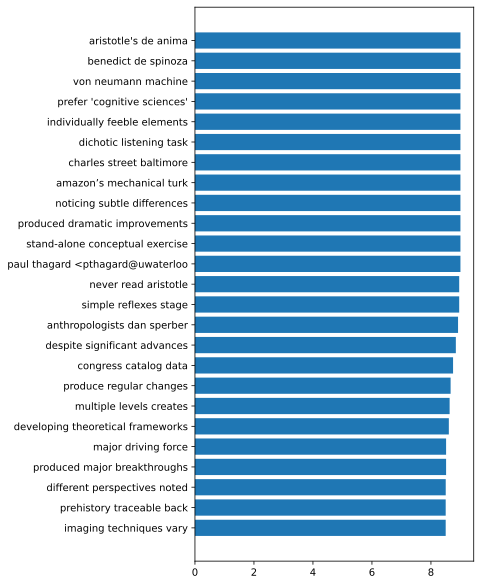

In [102]:
top25 = res[:25][::-1]

def plot_keywords(keywords:List[tuple]):
    plt.figure(figsize=(5, 10))
    k, v = zip(*top25)
    plt.barh(range(len(k)), v)
    plt.yticks(range(len(k)), k)

plot_keywords(top25)

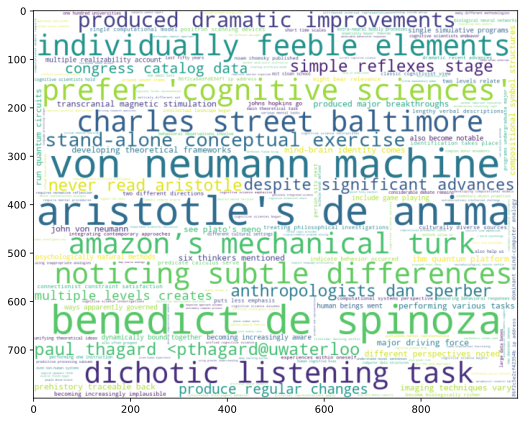

In [103]:
wc = WordCloud(background_color='white', width=1000, height=800)
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate_from_frequencies({k:v for k, v in res}))

Interestingly Aristotle's de anima, von Neumann machine and Spinoza seem to be keywords defining cognitive science :)